In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from numpy.linalg import inv
from IPython.display import Image
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

import IPython
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

<a id='top'></a>

### Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* [What are eigenvalues and eigenvectors? What are eigenvalues?](#What_are_eigenvalues)
* [What is the eigenbasis?](#What_is_the_eigenbasis) 
* [What is the spectrum of a matrix?](#What_is_the_spectrum)
* [How do we compute the eigenvalues and eigenvectors of a matrix?](#compute_the_eigenvalues)
* [What is projection?](#What_is_projection)
* [How does projection conserve some shapes? Think about an object casting a shadow](#projection_conserve_some_shapes)
* [How is the projection problem related to eigenvalues and eigenvectors?](#projection_problem_related_to_eigenvalues)
* [What is PCA?](#PCA)
* [What are principal components? How many components are there (as a function of dimensions of the original space)?](#principal_components)
* [What is variance? ](#What_is_variance)
* [What is explained variance?](#What_is_explained_variance)
* [How do principal components relate to explained variance?](#principal_components_relate_to_explained_variance)
* [How is PCA implemented?](#Implement)
* [Implement and show!](#show)
* [Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images](#Show_some_applications_of_PCA)
* [Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.](#practical_use)


[Reference and Links](#links)



<a id='What_are_eigenvalues'></a>
[TOP](#top)
# What are eigenvalues and eigenvectors
Eigenvectors and the corresponding eigenvalues can only be calculated for transformations (Matrixes). Those vectors when transformed by the transformation matrix (that would be a square matrix) keep their orientation but get scaled by an eigenvalue. 

Taking the example bellow:

let us have a matrix: $$A=\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

the first column indicates where the $x$ unit vector goes and the second where the $y$ unit vector goes (we will call them $\vec{i}$ and $\vec{j}$). 

we then transform two vectors $\vec{v}=\left[
\begin{array}{ccc}
2\\
3\\
\end{array}
\right] $ and $\vec{e}=\left[
\begin{array}{ccc}
-4\\
1\\
\end{array}
\right] $

let’s calculate the new coordinates of this vectors after the transformation


In [5]:
matrix = np.array([[2, -4], [-1, -1]])
print(f'Old coordinates  for the first vector v:[2, 3]')
print(f'New coordinates  for the first vector v:{np.matmul(matrix,np.transpose(np.array([2,3])))}')
print(f'Old coordinates  for the second vector e:[-4, 1]')
print(f'New coordinates  for the second vector e:{np.matmul(matrix,np.transpose(np.array([-4,1])))}')

Old coordinates  for the first vector v:[2, 3]
New coordinates  for the first vector v:[-8 -5]
Old coordinates  for the second vector e:[-4, 1]
New coordinates  for the second vector e:[-12   3]


It is easy to see that the new coordinates of $\vec{e}$ are scaled 3 times, thus the main direction of the vector is kept the same. The eigen value in our case is $\lambda=3$.
The formula bellow indicates that a Transformation matrix applied on an eigenvector is the same as simply scaling the vector
$$ Av = \lambda v $$

### We can also say that every point on vector $\vec{e}$ is "linear combination" of -4 times $\hat{i}$ and 1 time $\hat{j}$ 


We can have: irrational eigenvalues and vectors, one value with infinite vectors etc..
those are all scenarios not described here

In [6]:
def visualize_transformed_vector(matrix, vec, plot_title, trans=1):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors

    if trans : 
        ax.quiver([0], [0], [vec[0]], [vec[1]], color = ["green"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

#     New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    new_vec = t.transform_affine(vec)

    ax.quiver([0, 0, 0], [0, 0, 0], [new_x[0], new_y[0], new_vec[0]], [new_x[1], new_y[1], new_vec[1]], color = ["red", "blue","green"], units = "xy", angles = "xy", scale = 1)
    plt.gca().set_aspect("equal")
    plt.show()

<IPython.core.display.Javascript object>


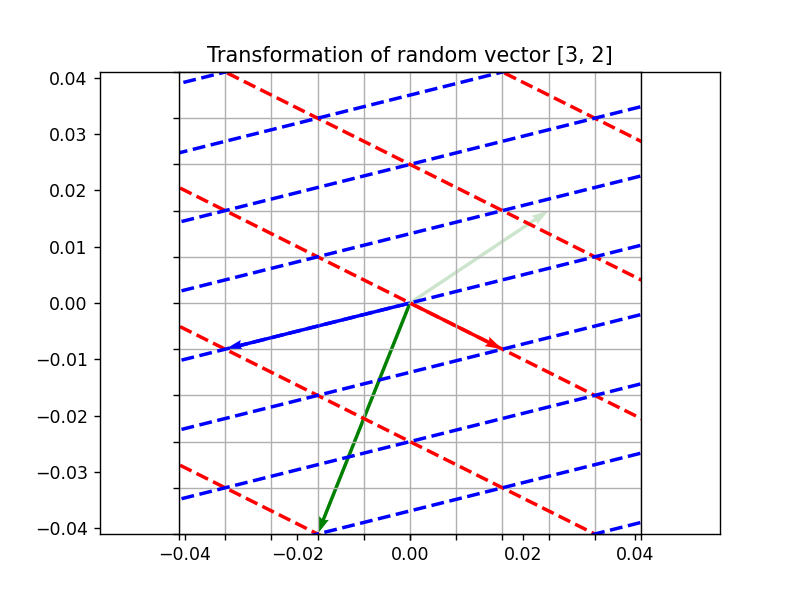

<IPython.core.display.Javascript object>


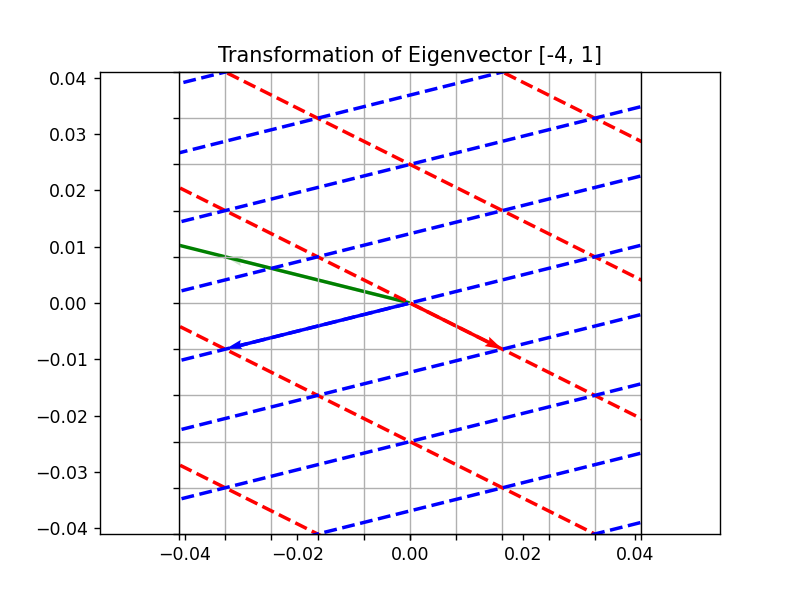

In [8]:
visualize_transformed_vector(matrix, [3, 2], "Transformation of random vector [3, 2]")
visualize_transformed_vector(matrix, [-4, 1], "Transformation of Eigenvector [-4, 1]")

<a id='What_is_the_eigenbasis'></a>
[TOP](#top)
# What is the eigenbasis? 

This is when we take the eigenvectors of our Transformation and use them as basic (unit) vectors for a new coordinate system.

We need to have enough  linearly independent eigenvectors, so that their Span overlaps with the initial Space.

Let consider our first example 
Transformation: $$\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

   and two eigenvectors:  $\vec{e_1}=\left[
\begin{array}{ccc}
-4\\
1\\
\end{array}
\right] $  ,  $\vec{e_2}=\left[
\begin{array}{ccc}
-2\\
-2\\
\end{array}
\right] $

   eigenvalues: $\lambda_1 =3  ,  \lambda_2=-2$
   

[4 4]


<IPython.core.display.Javascript object>


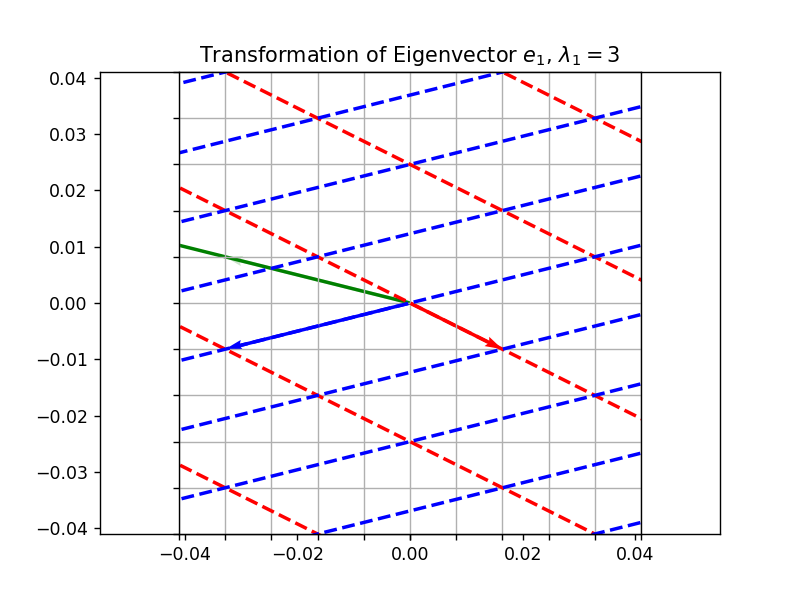

<IPython.core.display.Javascript object>


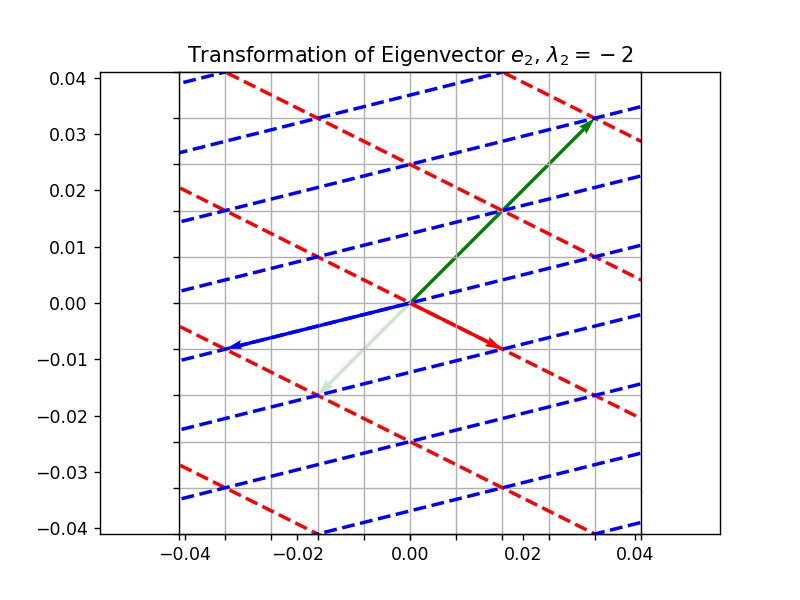

In [11]:
print(np.matmul(matrix,np.transpose(np.array([-2,-2]))))
visualize_transformed_vector(matrix, [-4, 1], "Transformation of Eigenvector $e_1$, $\lambda_1=3$")
visualize_transformed_vector(matrix, [-2, -2], "Transformation of Eigenvector $e_2$, $\lambda_2=-2$")

As $e_1$ and $e_2$ are independent vectors it is possible to describe any vector in our 2D Space using a linear combination of $e_1$ and $e_2$
this makes those two vectors good candidates for basic vectors, as they are also eigenvectors we would call it eigenbasis.

When we transform a vector $\vec{v}=\left[
\begin{array}{ccc}
a\\
b\\
\end{array}
\right]$ with our matrix $A$ we can represent it as first transforming the basic (unit) vectors $\vec{i}$ and $\vec{j}$ to $\vec{\hat{i}}$ and $\vec{\hat{j}}$.

Then performing the linear combination of $a*\vec{\hat{i}} +b*\vec{\hat{j}}$ that will give us the transformed $\vec{\hat{v}}$

this can be easily recognized in the first graph "Transformation of random vector"

Let's follow what is happening if we:

1/ switch to Eigenvector Basis. Use the inverse Matrix created from the Eigenvectors (the Eigenvectors are the columns)
$$P^{-1}=\left[
\begin{array}{ccc}
-0.2 ,   0.2\\
-0.1 ,  -0.4\\
\end{array}
\right] $$

2/ execute the transformation. In the eigenspace, this transformation just stretches the basic vectors (eigenvectors) with the eigenvalues
$$D=\left[
\begin{array}{ccc}
3, 0\\
0, -2\\
\end{array}
\right] $$
3/ switch to Standard Basis (those are the eigenvectors)
$$P=\left[
\begin{array}{ccc}
-4, -2\\
1, -2\\
\end{array}
\right] $$
this can be represented by the following 3 Matrix transformations

$$\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] = PDP^{-1}$$


with transformation Matrix :  $$A=\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

In [11]:
matrix = np.array([[2, -4], [-1, -1]])
v=[3,2]
e1=np.transpose(np.array([-4,1]))
e2=np.transpose(np.array([-2,-2]))

e1=np.atleast_2d(e1).T
e2=np.atleast_2d(e2).T

D=np.array([[3,0],[0,-2]])
P=np.concatenate((e1,e2), axis=1)
P_inv=inv(np.matrix(P))
print(f'Vector e1=\n {e1}')
print(f'Vector e2=\n {e2}')
print(f'Matrix , converts Eigenbasis to Standard Basis  P=\n {P}')
print(f'Matrix , Eigenvalues dot I (Identity matrix) representing the transformasion in EigenSpace  D=\n {D}')
print(f'Matrix , converts Standard Basis to Eigen Basis P^(-1)=\n {P_inv}')


Vector e1=
 [[-4]
 [ 1]]
Vector e2=
 [[-2]
 [-2]]
Matrix , converts Eigenbasis to Standard Basis  P=
 [[-4 -2]
 [ 1 -2]]
Matrix , Eigenvalues dot I (Identity matrix) representing the transformasion in EigenSpace  D=
 [[ 3  0]
 [ 0 -2]]
Matrix , converts Standard Basis to Eigen Basis P^(-1)=
 [[-0.2  0.2]
 [-0.1 -0.4]]


In [14]:
#Proven here
g1=np.matmul(D,P_inv)
g2=np.matmul(P,g1)
print(f'PDP^-1 = \n{g2}')
print(f'Matrix A = \n{matrix}')

PDP^-1 = 
[[ 2. -4.]
 [-1. -1.]]
Matrix A = 
[[ 2 -4]
 [-1 -1]]


In [11]:
print(f' Coordinates of the transformed voctor [3,2] in standard bases: \n  {np.matmul(matrix,np.transpose(np.array([3,2])))}')

 Coordinates of the transformed voctor [3,2] in standard bases: 
  [-2 -5]


In [12]:
f1=np.matmul(P_inv,np.transpose(np.array([3,2])))
print(f'Show the cordinates of vector [3,2] in EigenSpace coordinates: \n {f1}')

f2=np.matmul(D,np.transpose(f1))
print(f'Show the cordinates after the transformation executed in the Eigen Space: \n{f2}')

f3=np.matmul(P,f2)
print(f'Show the coordinates of the transformed vector back in the Standard Space: \n {f3}')


Show the cordinates of vector [3,2] in EigenSpace coordinates: 
 [[-0.2 -1.1]]
Show the cordinates after the transformation executed in the Eigen Space: 
[[-0.6]
 [ 2.2]]
Show the coordinates of the transformed vector back in the Standard Space: 
 [[-2.]
 [-5.]]


in eigen basis system


<IPython.core.display.Javascript object>


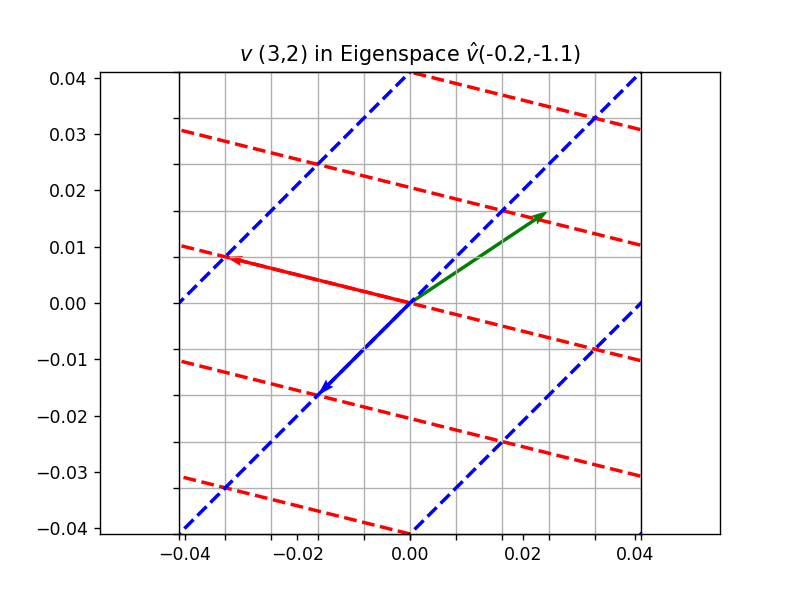

In [13]:

visualize_transformed_vector(np.array(P),[-0.2,-1.1],'$v$ (3,2) in Eigenspace $\hat{v}$(-0.2,-1.1)', trans=0)

<IPython.core.display.Javascript object>


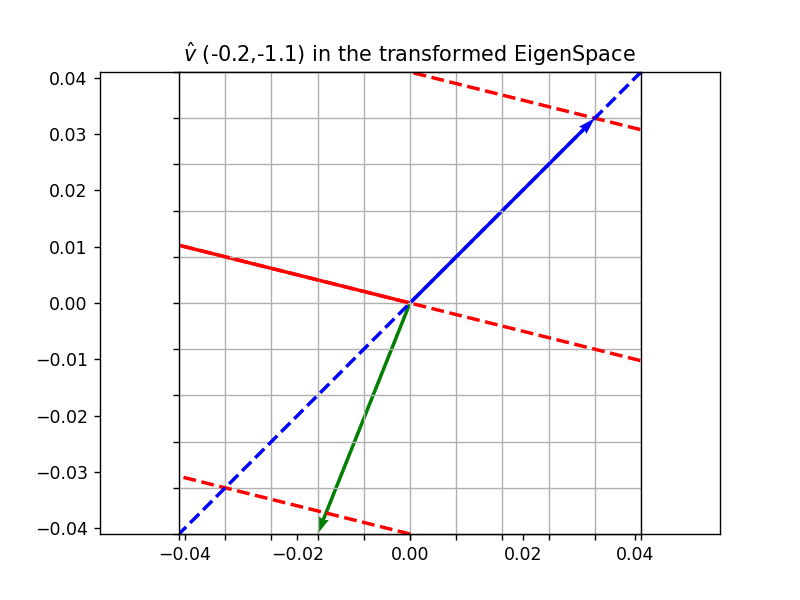

In [14]:
K=np.matmul(P,D)
visualize_transformed_vector(np.array(K),[-0.2,-1.1],'$\hat{v}$ (-0.2,-1.1) in the transformed EigenSpace ', trans=0)

[[ 2. -4.]
 [-1. -1.]]


<IPython.core.display.Javascript object>


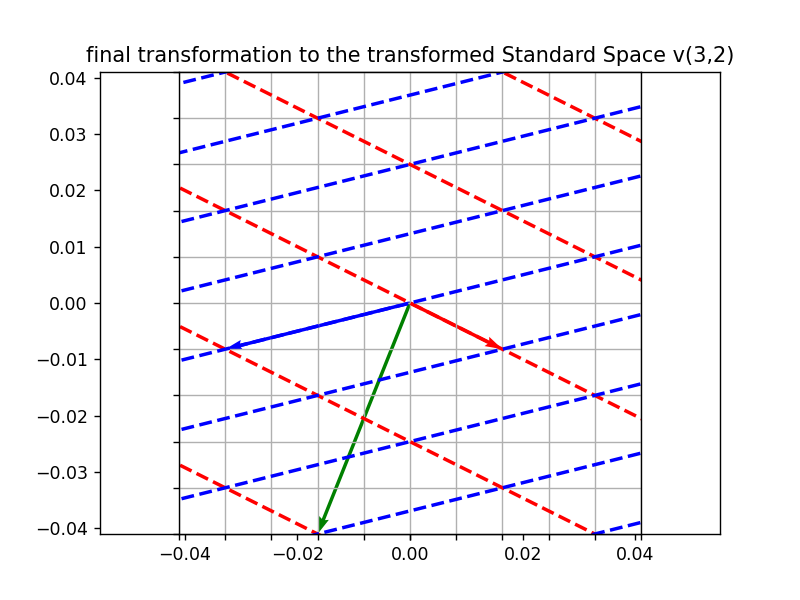

In [15]:
J=np.matmul(K,P_inv)
print(J)
visualize_transformed_vector(np.array(J),[3,2],'final transformation to the transformed Standard Space v(3,2)',trans=0)

<IPython.core.display.Javascript object>


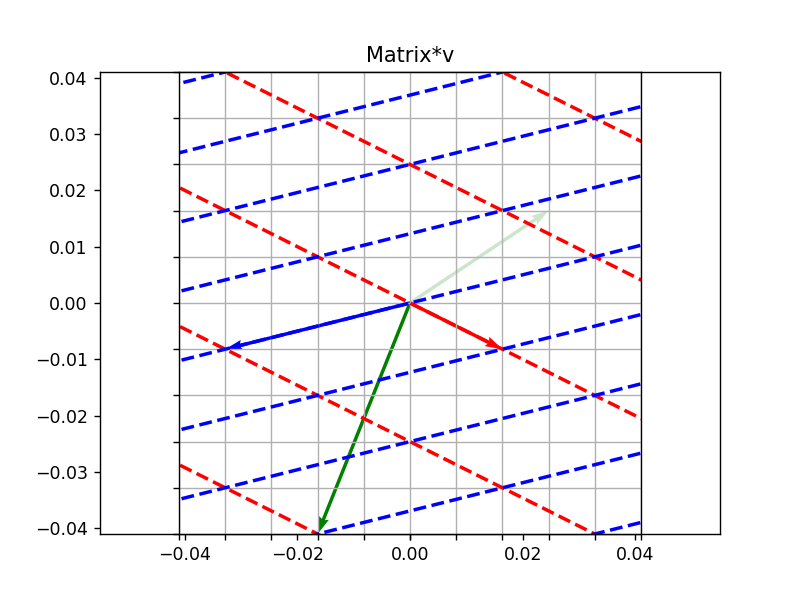

In [33]:
visualize_transformed_vector(matrix,[3,2],'Matrix*v')

[TOP](#top)
<a id='What_is_the_spectrum'></a>
# What is the spectrum of a matrix?

This is the set of all Eigenvalues $\lambda$ for a matrix $A$.

where : $ Av = \lambda v $

The Spectrum can be represented as : $\Lambda (A)=\{\lambda_0,\lambda_1,...\}$


<a id='compute_the_eigenvalues'></a>
[TOP](#top)
# How do we compute the eigenvalues and eigenvectors of a matrix?

We would follow the formula 
 $$Av = \lambda v $$
 $$Av- \lambda v = 0 $$
 $$Av- \lambda I v = 0 \ , \ where \  I=\begin{bmatrix}
    1 & 0 & 0 & \cdots \\ 
    0 & 1 & 0 & \cdots \\
    0 & 0 & 1 & \cdots \\
    \vdots & \vdots & \vdots & \ddots
 \end{bmatrix}  \ and \ v\ne0$$
 $$det(A-\lambda I)=0$$
  
 In our example $$A=\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

thus $$det(A-\lambda I)=det\left[
\begin{array}{ccc}
2-\lambda & -4 \\
-1 & -1-\lambda \\
\end{array}
\right]=(2-\lambda)(-1-\lambda)-(-4)(-1)=0\\ \lambda^2-\lambda -6 =0 \\ \\ (\lambda-3)(\lambda+2)=0$$
$$\lambda_1=3 \\ \lambda_2=-2$$
those are the two eigenvalues for our transformation Matrix $A$


### To compute the eigenvectors for those values, we will again use :
$$Av = \lambda_1 e_1 \\ Av = \lambda_2 e_2 $$
this time solving it for $e_1$ and $\lambda_1$
$$\begin{bmatrix}
    2 & -4 \\ 
    -1 & -1 \\
 \end{bmatrix}\begin{bmatrix}
    e_{1x} \\ 
    e_{1y} \\
 \end{bmatrix}=3\begin{bmatrix}
    e_{1x} \\ 
    e_{1y} \\
 \end{bmatrix} \\ 2e_{1x}-4e_{1y}=3e_{1x} \\ -e_{1x}-e_{1y}=3e_{1y}$$
 
 or:
 $$-e_{1x}-4e_{1y}=0 \\ -e_{1x}-4e_{1y}=0$$
 
 
 Note that these equations are not independent!
 any vector $e_1=t\begin{bmatrix}
    -4 \\ 
    1 \\
 \end{bmatrix}$ where $t$ is any nonzero scalar is eigenvector of $A$ corresponding to the eigenvalue $\lambda_1 = 3$ 
 
 
 same would apply for $e_2$ and $\lambda_2$
  $$4e_{1x}-4e_{1y}=0 \\ e_{1x}-e_{1y}=0$$
  any vector $e_2=t\begin{bmatrix}
    1 \\ 
    1 \\
 \end{bmatrix}$ where $t$ is any nonzero scalar is eigenvector of $A$ corresponding to the eigenvalue $\lambda_2 = −2$
 
 
 
 
 if you check in the beginning of my work you will notice that i have used eigenvector $e_2=\begin{bmatrix}-2 \\ -2 \\  \end{bmatrix}$ and still i get the same results

<a id='What_is_projection'></a>
[TOP](#top)

# What is projection?

Projecting one vector to another is very intuitive if we consider it geometrically 
as shown bellow we are projecting $\vec{x}$ onto $\vec{v}$

What we have on this plot is:
vector that we want to project onto another vector: $\vec{x}$

Vector on which we will project (in our case we will select one of the eigenvectors) : $\vec{v}$

the result of thois projection as a vector: $\vec{p}$
vector $\vec{d}$ orthogonal to $\vec{p}$ such that $\vec{p}+\vec{d}=\vec{x}$ that more or less represents the projection.


meaning $$\vec{d}=\vec{x}-\vec{p}$$

<IPython.core.display.Javascript object>


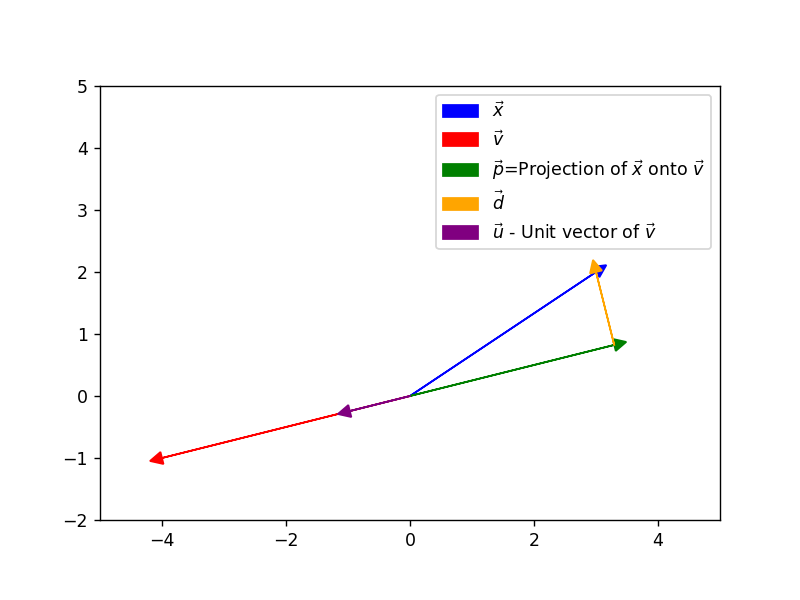

In [18]:
# Define vectors x and v
x = np.array([3, 2])
v = np.array([-4, -1])
# v = np.array([4, 1])

# Calculate the projection of x onto v
proj = np.dot(x, v) / np.dot(v, v) * v

# Calculate the unit vector of v
unit_v = v / np.linalg.norm(v)

# Plot the vectors and their projection
fig, ax = plt.subplots()
arrow_x = ax.arrow(0, 0, x[0], x[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', label='$\\vec{x}$')
arrow_v = ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='red', ec='red', label='$\\vec{v}$')
arrow_proj = ax.arrow(0, 0, proj[0], proj[1], head_width=0.2, head_length=0.2, fc='green', ec='green', label='$\\vec{p}$=Projection of $\\vec{x}$ onto $\\vec{v}$')
arrow_residual = ax.arrow(proj[0], proj[1], x[0] - proj[0], x[1] - proj[1], head_width=0.2, head_length=0.2, fc='orange', ec='orange', label='$\\vec{d}$')
arrow_unit_v = ax.arrow(0, 0, unit_v[0], unit_v[1], head_width=0.2, head_length=0.2, fc='purple', ec='purple', label='$\\vec{u}$ - Unit vector of $\\vec{v}$')


ax.set_xlim([-5, 5])
ax.set_ylim([-2, 5])
ax.set_aspect('equal')

# Add legend
plt.legend(handles=[arrow_x, arrow_v, arrow_proj, arrow_residual, arrow_unit_v])

plt.show()


It is clear that the projection is a equal to $\vec{v}$ times some scaler. 
As we want to make our calculations easier we will consider the unit vector of $\vec{v}$ 

that is $$\vec{u}={\vec{v}\over ||\vec{v}||}$$
then $$\vec{p}=k\vec{u}$$  
meaning that $$\vec{d}=\vec{x}-k\vec{u}$$

we know that that $\vec{d}$ and $\vec{p}$ are perpendicular, which means their dot-product is 0. we will use that to find the multiplier $k$

$$\vec{p}\cdot\vec{d}=0 \\ k\vec{u}\cdot(\vec{x}-k\vec{u})=0 \\ k\vec{x}\cdot\vec{u}-k^{2}\vec{u}\cdot\vec{u}=0 \\ k=\vec{x}\cdot\vec{u}$$

then $$\vec{p}=k\vec{u} \\ \vec{p}=(\vec{x}\cdot\vec{u})\vec{u} \\ \vec{p}={\vec{x}\cdot \vec{v} \over ||\vec{v}||}\vec{u}$$

<a id='projection_conserve_some_shapes'></a>
[TOP](#top)

# How does projection conserve some shapes? Think about an object casting a shadow


Imagine that we have a set of points in a 3D space that create a Mug like the one below. 

Let’s imagine that we project this 3D Mug onto different 2D spaces, thus reducing the dimensions.

In [35]:
Image(url="mug-projections.png", width=300, height=300)


Looking at the image above we can intuitively recognize how the different projections represent the original set/object differently. The projection on $H_B$ doesn’t bring us enough information to recognize the original as a Mug, while the projection on $H_C$ looks like an emoji of a Mug.

this is why it is important to carefully choose how to project our original set of data.

We must keep in mind that the projection on $H_C$ still loses some of the information about the Mug but we want it to be the projection that minimizes this loss!

<a id='projection_problem_related_to_eigenvalues'></a>
[TOP](#top)


# How is the projection problem related to eigenvalues and eigenvectors?

I am not sure there is a Projection problem as it is possible to always project one vector to another.
I will try to answer to another question. Why is it better to project data to eigenvectors. 
If we project 3D space to the 2D Space defined by the eigenvectors of this Projection/Transformation. we will be able to represent every original vector as a scale of the eigenvectors in the 2D Space.
or to put in another way:
The projection problem is related to eigenvalues and eigenvectors because eigenvectors provide a basis for subspaces that are invariant under the linear transformation (Projection), enabling us to solve the projection problem by decomposing the vector space into these subspaces.


<a id='PCA'></a>
[TOP](#top)

# What is PCA?

Principal Component Analysis (PCA) is a popular dimensionality reduction technique that aims to transform a high-dimensional dataset into a lower-dimensional space while retaining most of the information. PCA works by identifying the directions that capture the most variation in the data and projecting the data onto those directions, which are called principal components.

<a id='principal_components'></a>
[TOP](#top)

# What are principal components? How many components are there (as a function of dimensions of the original space)?

The Principal Components are the eigenvectors of the covariance matrix. As the covariance matrix is a square symmetric matrix, it can be diagonalized by choosing a new orthogonal coordinate system, given by its eigenvectors. There are as many components as there are dimensions.

<a id='What_is_variance'></a>
[TOP](#top)

# What is variance?

Simply put, the variance is a measure of spread around the mean. The main idea behind the calculation of the variance is to quantify the typical concentration of values around the mean. The way this is done is by averaging the squared deviations from the mean.

$$Var(X)={(x_1-\bar{x})^2+\cdots + (x_n-\bar{x})^2 \over n} \\ ={1\over n}\sum_{i=1}^{n} (x_i-\bar{x})^2$$

Let’s dissect the terms and operations involved in the formula of the variance.

+ the main terms are the deviations from the mean  $x_i-\bar{x})$ , that is, the difference between each observation $x_i$ and the mean $\bar{x}$

+ conceptually speaking, we want to know what is the average size of the deviations around the mean.

+ simply averaging the deviations won’t work because their sum is zero (i.e.  the sum of deviations around the mean will cancel out because the mean is the balancing point).

+ this is why we square each deviation: $(x_i-\bar{x})^2$, which literally means getting the squared distance from $x_i$ to $\bar{x}$

+ having squared all the deviations, then we average them to get the variance.

Because the variance has squared units, we need to take the square root to “recover” the original units in which $X$ is expressed. This gives us the standard deviation
$$sd(X)=\sqrt{{1\over n}\sum_{i=1}^{n} (x_i-\bar{x})^2}$$
In this sense, you can say that the standard deviation is roughly the average distance that the data points vary from the mean.

In practice, you will often find two versions of the formula for the variance: one in which the sum of squared deviations is divided by $n$ , and another one in which the division is done by $n−1$. Each version is associated to the statistical inference view of variance in terms of whether the data comes from the population or from a sample of the population.

The population variance is obtained dividing by $n$ :


population variance:$${1\over n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


The sample variance is obtained dividing by $n-1$ instead of dividing by $n$. The reason for doing this is to get an unbiased estimator of the population variance:

sample variance:$${1\over n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


### In PCA the variance is also the eigenvalue of the eigenvector. as we have established above the eigenvector is actually the Principal Component. Thus for each PC we have eigenvalue that corresponds to the variance on this PC. 
Remember that we wanted such eigenvectors/PCs that we have minimal loss of information(meaning maximum Variance)

<a id='What_is_explained_variance'></a>
[TOP](#top)

# What is explained variance?

Explained variance is a variable that $\in [0;1]$



When we apply PCA, it is often important to understand how much of the variation in the data is explained by each principal component. This is where the concept of “explained variance” comes in. Explained variance measures the proportion of variance in the data that is explained by each principal component.

PCA is a linear transformation technique that identifies the directions that capture the most variation in the data and projects the data onto those directions, which are called principal components. Each principal component is a linear combination of the original variables, and the first principal component captures the most variation in the data, the second principal component captures the second-most variation, and so on.

Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis. 

The concept of Explained variance is useful in assessing how important each component is. In general, the larger the variance explained by a principal component, the more important that component is. PCA is a technique used to reduce the dimensionality of data. It does this by finding the directions of maximum variance in the data and projecting the data onto those directions. The amount of variance explained by each direction is called the “explained variance.” Explained variance can be used to choose the number of dimensions to keep in a reduced dataset. It can also be used to assess the quality of a machine learning model. In general, a model with high explained variance will have good predictive power, while a model with low explained variance may not be as accurate.

Let’s understand the concept of Explained variance with examples. For example, if we have a dataset with 100 samples and 10 features, and we want to reduce it to two dimensions using PCA, we would expect the first component to explain about 86% of the variance (9/10), and the second component to explain about 14% (1/10). Explained variance can also be used to compare different PCA models. For example, if we compare two models that both reduce a dataset from 10 dimensions to 2, but one explains 80% of the variance and the other explains 95% of the variance, we would say that the latter model is better at representing the data.

Explained variance can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors. Let’s say that there are N eigenvectors, then the explained variance for each eigenvector (principal component) can be expressed the ratio of eigenvalue of related eigenvalue $\lambda_i$ and sum of all eigenvalues $(\lambda_1+\lambda_2+\cdots+\lambda_n)$
 as the following: $${\lambda_i \over \lambda_1+\lambda_2+\cdots+\lambda_n}$$
 

Recall that a set of eigenvectors and related eigenvalues are found as part of eigen decomposition of  transformation matrix  which is covariance matrix in case of principal component analysis (PCA). These eigenvectors represent the principal components that contain most of the information (variance) represented using features (independent variables). The explained variance ratio represents the variance explained using a particular eigenvector.

### Kaggle Data related to [campus placement](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement) is used in the code given in the following sections.

In [36]:
kampusveri=pd.read_csv('Placement_Data_Full_Class.csv')

In [37]:
from sklearn.model_selection import train_test_split
kampusveri["salary"].fillna(value=kampusveri["salary"].median(), inplace=True)
kampusveri=kampusveri.drop(['sl_no'], axis=1)
x=kampusveri.drop(['status'], axis=1)
x=pd.get_dummies(x, columns = ['hsc_b','hsc_s', 'workex','degree_t','gender', 'ssc_b', 'specialisation'])
y=kampusveri['status']
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.25 , random_state=40)

In [38]:
X_train.head()

ssc_p  hsc_p  degree_p  etest_p  mba_p    salary  hsc_b_Central  \
122   66.5  66.80     69.30     80.4  71.00  236000.0              1   
59    52.6  65.58     72.11     57.6  56.66  265000.0              0   
152   75.4  60.50     84.00     98.0  65.25  240000.0              1   
188   61.8  47.00     54.38     57.0  56.13  265000.0              0   
24    76.5  97.70     78.86     97.4  74.01  360000.0              0   

     hsc_b_Others  hsc_s_Arts  hsc_s_Commerce  ...  workex_Yes  \
122             0           1               0  ...           1   
59              1           0               0  ...           0   
152             0           0               0  ...           0   
188             1           0               1  ...           0   
24              1           0               0  ...           0   

     degree_t_Comm&Mgmt  degree_t_Others  degree_t_Sci&Tech  gender_F  \
122                   1                0                  0         1   
59                    0                0                  1         0   
152                   0                0                  1         1   
188                   1                0                  0         0   
24                    0                0                  1         0   

     gender_M  ssc_b_Central  ssc_b_Others  specialisation_Mkt&Fin  \
122         0              1             0                       1   
59          1              1             0                       1   
152         0              0             1                       1   
188         1              0             1                       1   
24          1              0             1                       1   

     specialisation_Mkt&HR  
122                      0  
59                       0  
152                      0  
188                      0  
24                       0  

[5 rows x 22 columns]

<IPython.core.display.Javascript object>


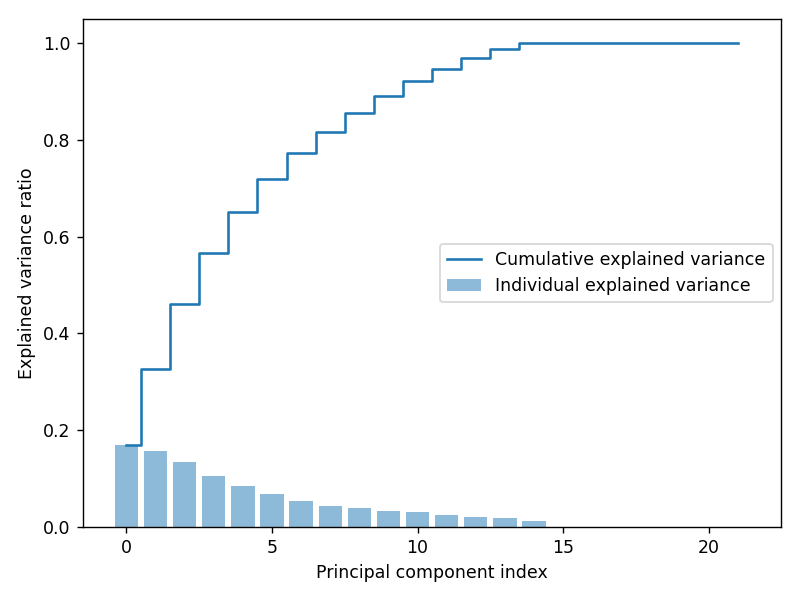

In [41]:
#
# Scale the dataset; This is very important before you apply PCA
#

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<a id='principal_components_relate_to_explained_variance'></a>
[TOP](#top)

# How do principal components relate to explained variance?

As stated above, the concept of Explained variance is useful in assessing how important each component is. In general, the larger the variance explained by a principal component, the more important that component is. 

<a id='Implement'></a>
[TOP](#top)

# How is PCA implemented? 

## Steps to implement PCA in Python
    
### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

```python
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
```
Data generated by the above code have dimensions (20,5) i.e. 20 examples and 5 variables for each example. we calculated the mean of each variable and subtracted that from every row of the respective column.

### 2. Calculate the Covariance Matrix
Calculate the Covariance Matrix of the mean-centered data. 

The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.

That’s why the diagonal elements of a covariance matrix are just the variance of the elements.
```python
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
```
We can find easily calculate covariance Matrix using numpy.cov( ) method. The default value for rowvar is set to True, remember to set it to False to get the covariance matrix in the required dimensions.

### 3. Compute the Eigenvalues and Eigenvectors
Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

Orthogonal means the vectors are mutually perpendicular to each other. Eigenvalues and vectors seem to be very scary until we get the idea and concepts behind it.

```python
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
```
NumPy linalg.eigh( ) method returns the eigenvalues and eigenvectors of a complex Hermitian or a real symmetric matrix.

### 4. Sort Eigenvalues in descending order
Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.
```python 
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
```
np.argsort returns an array of indices of the same shape.

### 5. Select a subset from the rearranged Eigenvalue matrix
Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. This means we selected the first two principal components.
```python 
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
```
n_components = 2 means our final data should be reduced to just 2 variables. if we change it to 3 then we get our data reduced to 3 variables.

### 6. Transform the data
Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.
```python
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
```
The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

Now we can visualize our data with the available tools we have. 



In [1]:
#Complete Code for Principal Component Analysis in Python
#let’s just combine everything above by making a function and try our PCA from scratch on an example.

def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

<a id='show'></a>
[TOP](#top)


# Implement and show

### We defined a function named PCA accepting data matrix and the number of components as input arguments.

We’ll use IRIS dataset and apply our PCA function to it.

In [43]:
#Get the IRIS dataset

data = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

We can see on the table below that we have 4 features for each row (example). it is not possible to plot this as this is the same as presenting each row (example) in 4D Space.


In [44]:
x.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

After the PCA transformation we can represent this in 2D

<IPython.core.display.Javascript object>


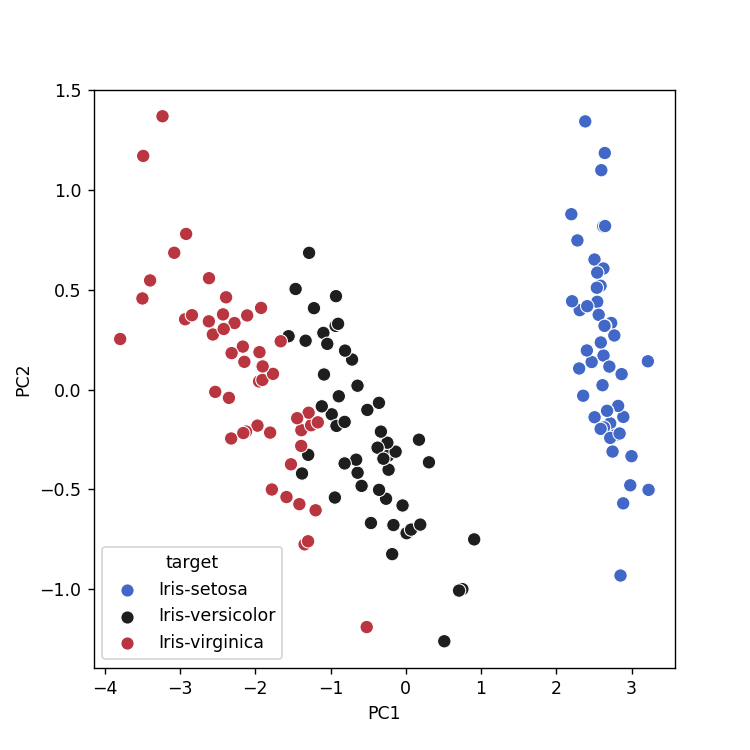

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

In [46]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


<a id='Show_some_applications_of_PCA'></a>
[TOP](#top)


# Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images


<IPython.core.display.Javascript object>


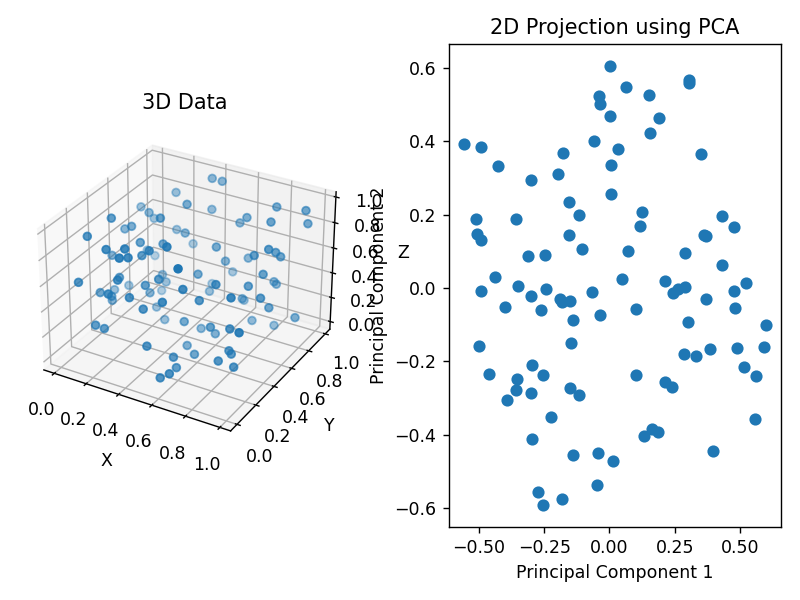

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Create a random 3D dataset
np.random.seed(42)
x = np.random.rand(100, 3)

# Apply PCA to reduce dimensionality from 3D to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Plot the 3D data
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data')

# Plot the 2D projection
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_pca[:, 0], x_pca[:, 1])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Projection using PCA')

plt.tight_layout()
plt.show()

<a id='practical_use'></a>
[TOP](#top)

# Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.


For this example I am using the Titanic dataset that can be downloaded from [Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv).
We will clear and prepare the date set in such a way that we end up with 8 features. Then using PCA we will reduce them to 3D and using color code will actually add a 4th.. kind of dimension that will indicate the survivals and the casualties.



In [19]:
titanic = pd.read_csv('titanic.csv')
orig_titanic = pd.read_csv('titanic.csv')
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic['Embarked'] = titanic['Embarked'].fillna(method='ffill')
titanic['Age'] = titanic['Age'].fillna(method='ffill')
for label in ['Embarked','Sex']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])
labels = titanic['Survived']
features = titanic.drop(['Survived'], axis=1)
# PCA basically tries to pull everything together while maximizing variance between each point
model = PCA(n_components=3)
model.fit(features)
X_3D = model.transform(features)

In [20]:
print('Before cleaning the data')
orig_titanic.head()

Before cleaning the data


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
print('After cleaning the data')
titanic.head()

After cleaning the data


Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [22]:
print('Covariance Matrix')
print(np.round(model.get_covariance(),2).astype(int))

Covariance Matrix
[[   0    0   -3    0    0  -22    0]
 [   0    0    0    0    0   -4    0]
 [  -3    0  211   -3   -1   60    0]
 [   0    0   -3    1    0    8    0]
 [   0    0   -1    0    0    8    0]
 [ -22   -4   60    8    8 2469   -9]
 [   0    0    0    0    0   -9    0]]


In [23]:
print('Eigenvalues')
print(np.round(model.explained_variance_,decimals=1))
print('Eigenvectors')
print(np.round(model.components_,decimals=2))

Eigenvalues
[2.4714e+03 2.1030e+02 1.3000e+00]
Eigenvectors
[[-0.01 -0.    0.03  0.    0.    1.   -0.  ]
 [-0.01  0.    1.   -0.02 -0.01 -0.03 -0.  ]
 [ 0.14 -0.05  0.02  0.89  0.41 -0.    0.15]]


In [24]:

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
init_notebook_mode(connected=False)
live_x, live_y, live_z = X_3D[labels == 1].T
dead_x, dead_y, dead_z = X_3D[labels == 0].T
alive = go.Scatter3d(
    x=live_x,
    y=live_y,
    z=live_z,
    mode='markers',
    name='Survivors',
    marker=dict(
        color='blue',
        size=3,
        opacity=0.9
    )
)
dead = go.Scatter3d(
    x=dead_x,
    y=dead_y,
    z=dead_z,
    mode='markers',
    name='Casualties',
    marker=dict(
        color='red',
        size=3,
        opacity=0.9
    )
)
layout = go.Layout(title = 'Titanic 3D')
fig = go.Figure(data=[alive, dead], layout=layout)
iplot(fig)

<a id='links'></a>
[TOP](#top)

# Reference and Links


### Eigenvalues, eigenvectors and projection

https://allmodelsarewrong.github.io/pca.html - PCA explained

https://www.youtube.com/watch?v=dhK8nbtii6I - Video explaining PCA (part of videotutorial)

https://www.youtube.com/@3blue1brown - Linear Algebra

https://www.youtube.com/watch?v=FgakZw6K1QQ&t=633s - Video presentation of PCA 

https://www.youtube.com/watch?v=EJG6gBeVdfw - Visualizing Diagonalization & Eigenbases

https://www.youtube.com/watch?v=K-yDVqijSYw - Matrix Spectrum and spectral radius

https://www.youtube.com/watch?v=cdBSQep5HJw - A first look at eigenvalues. What are the eigenvalues of projection matrix and permutation matrix?

https://www.youtube.com/watch?v=M_xq_rIllac&t=137s - The orthogonal projection matrix - example

https://vitalflux.com/pca-explained-variance-concept-python-example/#comments - PCA Explained Variance Concepts with Python Example

https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/eigenvalues-and-eigenvectors/determining-the-eigenvectors-of-a-matrix - Determining the Eigenvectors of a Matrix

https://www.statisticshowto.com/residual-sum-squares/?_gl=1*182rkz*_up*MQ..*_ga*MTMxNDgxMjk0MS4xNjg0MzI3OTkw*_ga_BDDC5TR12E*MTY4NDMyNzk4OC4xLjAuMTY4NDMyNzk4OC4wLjAuMA.. - Sum of Squares: Residual Sum, Total Sum, Explained Sum, Within

### PCA

https://arxiv.org/pdf/1404.1100v1.pdf - A Tutorial on Principal Component Analysis

https://www.askpython.com/python/examples/principal-component-analysis - Principal Component Analysis from Scratch in Python

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues - Making sense of principal component analysis, eigenvectors & eigenvalues



https://carlosgrande.me/dimensionality-reduction-using-pca/ - Dimensionality reduction using PCA

https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371 - PCA (Principal Components Analysis) applied to images of faces

### Examples

https://medium.com/lambda-school-machine-learning/principal-component-analysis-and-what-is-it-really-using-python-8f04dbdb1600 - Principal Component Analysis and what is it really? (using Python)

https://towardsdatascience.com/reshaping-numpy-arrays-in-python-a-step-by-step-pictorial-tutorial-aed5f471cf0b - Reshape numpy arrays in Python — a step-by-step pictorial tutorial

https://www.kaggle.com/ - Kaggle

https://chat.openai.com/ - Chat-GPT

### Something fun to rest

https://www.youtube.com/@zefrank
